In [52]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from pprint import pprint
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

from sklearn.dummy import DummyClassifier
import itertools
import warnings
warnings.simplefilter('ignore')


In [4]:
pd.set_option('display.max_columns', None)
wine= pd.read_csv('clean_wine.csv')

In [5]:
wine.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'type_group'],
      dtype='object')

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6463 entries, 0 to 6462
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
 13  type_group            6463 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 707.0+ KB


In [7]:
wine['value'] = wine['type'].apply(lambda x: 1 if x == 'white' else 2)

In [8]:
wine['value_type'] = wine['type_group'].apply(lambda x: 1 if x == 'high' else (2 if x=='medium' else 3))

In [9]:
wine.type_group.value_counts()

medium    3894
low       2372
high       197
Name: type_group, dtype: int64

In [10]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_group,value,value_type
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,medium,1,2
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium,1,2
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium,1,2
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,1,2
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6458,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,medium,2,2
6459,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low,2,3
6460,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium,2,2
6461,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low,2,3


In [81]:
X = wine.drop(columns = ['type', 'quality','type_group','value_type'])
y = wine['value_type']

### Train Test Split

In [82]:

X_r, y_r = SMOTE().fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

In [83]:
print('Training set: ', X_train.shape, y_train.shape)
print('Testing set: ', X_test.shape, y_test.shape)

Training set:  (9345, 12) (9345,)
Testing set:  (2337, 12) (2337,)


### Baseline

In [84]:
dummy_clf = DummyClassifier(strategy= 'most_frequent').fit(X_train,y_train)
dummy_pred = dummy_clf.predict(X_test)
dummy_clf.score(X_train, y_train)

0.33418940609951847

### Logistic Regression

In [85]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()


Accuracy:  0.5626872058194267


In [86]:
def plot_confusion_matrix(cm, classes,
                            normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=2)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [87]:
def datatable(y_test,pred):
    data = { 
        'Micro': [ 
    precision_score(y_test,pred, 
                                               pos_label='positive',
                                               average='micro'),
    recall_score(y_test,pred, 
                                               pos_label='positive',
                                               average='micro'),
    f1_score(y_test,pred, 
                                               pos_label='positive',
                                               average='micro')],

        'Macro': [
            precision_score(y_test,pred, 
                                               pos_label='positive',
                                               average='macro'),
    recall_score(y_test, pred, 
                                               pos_label='positive',
                                               average='macro'),
    f1_score(y_test, pred, 
                                               pos_label='positive',
                                               average='macro')],
        'Weighted':[
       precision_score(y_test,pred, 
                                               pos_label='positive',
                                               average='weighted'),
    recall_score(y_test, pred, 
                                               pos_label='positive',
                                               average='weighted'),
    f1_score(y_test,pred, 
                                               pos_label='positive',
                                               average='weighted')]}

    return pd.DataFrame(data,
                      index=pd.Index(['Precison', 'Recall', 'F1 Score', ], ),
                      columns=pd.Index(['Micro', 'Macro', 'Weighted'],))    

In [88]:
datatable(y_test,y_pred)

,Micro,Macro,Weighted
Precison,0.562687,0.532574,0.531821
Recall,0.562687,0.564466,0.562687
F1 Score,0.562687,0.537786,0.536477


### Hyper Tuning Logistic Regression 

In [90]:
clf = LogisticRegression()
grid_values = {'penalty'
               : ['l1', 'l2'],'C':[100,110,120,140,200,1000,2000],'max_iter':[150,250,350,450],'dual':[True,False]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, verbose=0, cv=10)
grid_clf_acc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 110, 120, 140, 200, 1000, 2000],
                         'dual': [True, False],
                         'max_iter': [150, 250, 350, 450],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [91]:
grid_clf_acc.best_params_


{'C': 140, 'dual': False, 'max_iter': 450, 'penalty': 'l2'}

In [92]:
refclf = LogisticRegression(C=2000,penalty='l2',dual = False, max_iter = 450)
refclf.fit(X_train,y_train)
refpred=refclf.predict(X_test)

In [93]:

cm = confusion_matrix(y_test,refpred)
classes = ['Red Wine', 'White Wine']

Confusion Matrix, without normalization
[[536 205  38]
 [260 265 262]
 [ 53 148 570]]


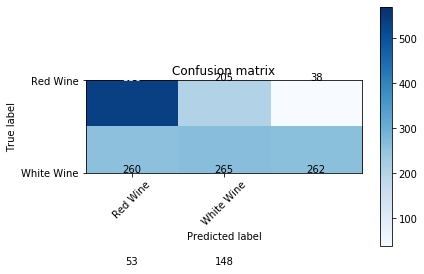

In [94]:

plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [95]:
datatable(y_test,refpred)

,Micro,Macro,Weighted
Precison,0.58665,0.571769,0.570994
Recall,0.58665,0.588028,0.586650
F1 Score,0.58665,0.576800,0.575713


### Random Forest

In [ ]:
rfc2 = RandomForestClassifier(random_state=42)
rfc2.fit(X_train, y_train)
test_pred = rfc2.predict(X_test)
accuracy_score(y_test, test_pred)

In [ ]:
cm = confusion_matrix(y_test,test_pred)
classes = ['Red Wine', 'White Wine']

In [ ]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [ ]:
datatable(y_test,test_pred)


### HyperTuning Random Forest

In [76]:
param_grid = {
    'n_estimators': [50, 100],
    'criterion':['gini', 'entropy'],
    'min_samples_leaf':[2,4],
    'min_samples_split':[3,5],
    'bootstrap': [True, False]
}

In [77]:
gridsearch = GridSearchCV(estimator=rfc2, param_grid=param_grid, cv=5, n_jobs=-1)
gridsearch.fit(X_train, y_train)

NameError: name 'rfc2' is not defined

In [35]:
gridsearch.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

In [62]:
rfc_ref = RandomForestClassifier(criterion = 'gini', min_samples_split=3, min_samples_leaf=1,n_estimators=100,
                                bootstrap= False,random_state=42, n_jobs=-1)
rfc_ref.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [63]:
refined_pred = rfc_ref.predict(X_test)


In [64]:
cm = confusion_matrix(y_test,refined_pred)
classes = ['Red Wine', 'White Wine']

In [65]:
datatable(y_test,refined_pred)

,Micro,Macro,Weighted
Precison,0.886607,0.886311,0.886291
Recall,0.886607,0.886771,0.886607
F1 Score,0.886607,0.886448,0.886356


### KNN

In [40]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)

y_predknn = model.predict(X_test)

In [41]:
cm = confusion_matrix(y_test,y_predknn)
classes = ['Red Wine','White Wine']

Confusion Matrix, without normalization
[[761  16   2]
 [140 443 204]
 [ 42 211 518]]


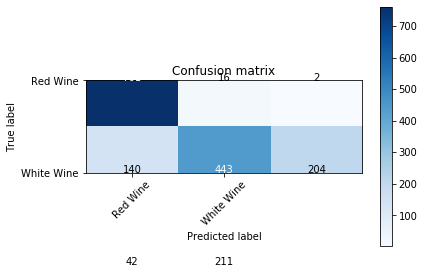

In [42]:

plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [43]:
datatable(y_test,y_predknn)

,Micro,Macro,Weighted
Precison,0.736842,0.727888,0.727702
Recall,0.736842,0.737215,0.736842
F1 Score,0.736842,0.728310,0.728020


[0.8521380462913682, 0.802694728046696, 0.7797163206035532, 0.755731504752944, 0.7509448168361511, 0.7280199148908403, 0.7183655612389813, 0.7057105318810555, 0.7009119673549332, 0.7034528381493104, 0.7016541371195114]


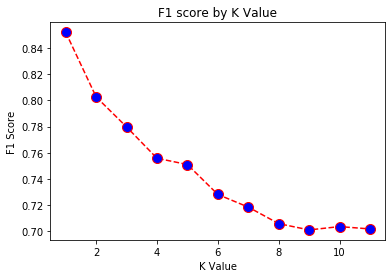

In [44]:
k_range = list(range(1, 12))
k_scores = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_predict = knn.predict(X_test)
        score = f1_score(y_test, y_predict, average='weighted')
        k_scores.append(score)
print(k_scores)

plt.plot(range(1, 12), k_scores, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

### Hyper Tuning KNN

In [45]:
model2 = KNeighborsClassifier(n_neighbors=1)
model2.fit(X_train, y_train)

y_predknnbest = model2.predict(X_test)

In [46]:
cm1 = confusion_matrix(y_test,y_predknnbest)
classes = ['Red Wine','White Wine']

Confusion Matrix, without normalization
[[762  13   4]
 [ 65 566 156]
 [  9  92 670]]


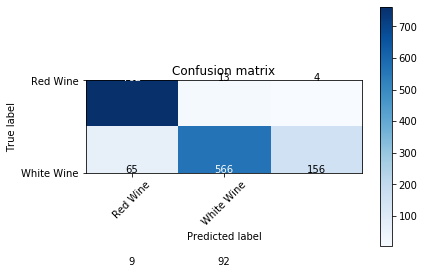

In [47]:
plot_confusion_matrix(cm1, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [48]:
datatable(y_test,y_predknnbest)


,Micro,Macro,Weighted
Precison,0.854942,0.854076,0.854201
Recall,0.854942,0.855455,0.854942
F1 Score,0.854942,0.852345,0.852138


### XGBoost

In [49]:
xgb = XGBClassifier(n_jobs = 3)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=3,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [50]:
prediction = xgb.predict(X_test)

In [51]:
cm2 = confusion_matrix(y_test,prediction)
classes = ['Red Wine', 'White Wine']

Confusion Matrix, without normalization
[[713  58   8]
 [140 445 202]
 [ 22 134 615]]


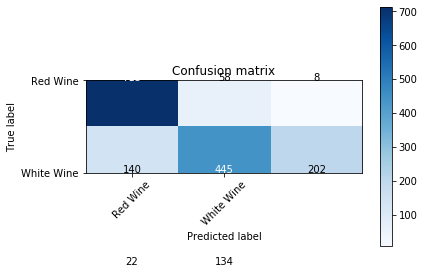

In [52]:
plot_confusion_matrix(cm2, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [53]:
datatable(y_test,prediction)

,Micro,Macro,Weighted
Precison,0.758665,0.752966,0.752806
Recall,0.758665,0.759460,0.758665
F1 Score,0.758665,0.752610,0.752111


### Hyper Tuned XGBoost

In [54]:
params = {
        'min_child_weight': [1, 5, 10],
    'n_estimators': [50, 100],
        'gamma': [1, 1.5, 2, 5,10],
        'subsample': [0.6, 0.8, 1.0],
    'criterion':['gini', 'entropy'],
            'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [55]:
gridsearch = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=31)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=3,
                                     nthread=None, objective='multi:softprob',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=31,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [2, 4],
               

In [56]:
gridsearch.best_params_


{'bootstrap': True,
 'criterion': 'gini',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

In [57]:
xgb_gs = XGBClassifier(bootstrap=True, criterion= 'gini', min_samples_leaf= 2, min_samples_split= 3,
n_estimators=100,n_jobs = 3)
xgb_gs.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=True,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              criterion='gini', gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, min_samples_leaf=2,
              min_samples_split=3, missing=None, n_estimators=100, n_jobs=3,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [58]:
refined_p = xgb_gs.predict(X_test)


In [59]:
cm = confusion_matrix(y_test,refined_p)
classes = ['Red Wine', 'White Wine']

Confusion Matrix, without normalization
[[713  58   8]
 [140 445 202]
 [ 22 134 615]]


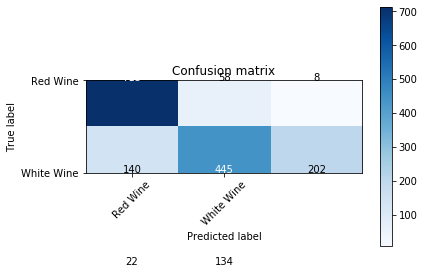

In [60]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [61]:
datatable(y_test,refined_p)


,Micro,Macro,Weighted
Precison,0.758665,0.752966,0.752806
Recall,0.758665,0.759460,0.758665
F1 Score,0.758665,0.752610,0.752111


### Hyper Tuning Best Model

In [61]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'value'],
      dtype='object')

[0.07399751 0.1097767  0.08148569 0.07798534 0.07846219 0.08374792
 0.08325362 0.0874783  0.07417964 0.08121854 0.15735038 0.01106416]


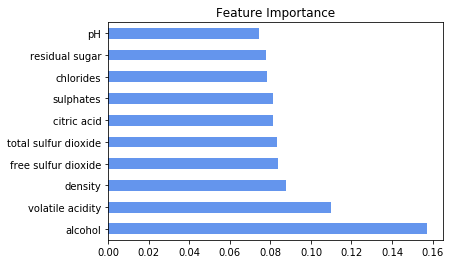

In [68]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
    #plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='cornflowerblue')
plt.title('Feature Importance')
plt.show()

In [96]:
X = wine.drop(columns = ['type', 'quality','type_group','value_type','alcohol'])
y = wine['value_type']

In [97]:
X_r, y_r = SMOTE().fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

In [98]:
rfc2 = RandomForestClassifier(random_state=42)
rfc2.fit(X_train, y_train)
test_pred = rfc2.predict(X_test)
accuracy_score(y_test, test_pred)

0.8823277706461276

In [99]:
cm = confusion_matrix(y_test,test_pred)
classes = ['Red Wine', 'White Wine']


Confusion Matrix, without normalization
[[774   3   2]
 [ 29 632 126]
 [  6 109 656]]


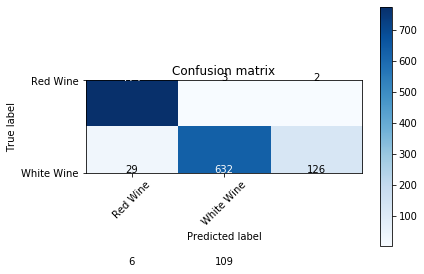

In [100]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [101]:
datatable(y_test,test_pred)


,Micro,Macro,Weighted
Precison,0.882328,0.880978,0.881021
Recall,0.882328,0.882491,0.882328
F1 Score,0.882328,0.881382,0.881320


In [102]:
param_grid = {
    'n_estimators': [50, 100],
    'criterion':['gini', 'entropy'],
    'min_samples_leaf':[2,4],
    'min_samples_split':[3,5],
    'bootstrap': [True, False]
}

In [ ]:
gridsearch = GridSearchCV(estimator=rfc2, param_grid=param_grid, cv=5, n_jobs=-1)
gridsearch.fit(X_train, y_train)

In [ ]:
gridsearch.best_params_
